# Análise Exploratória
***

Objetivo: Entender as relações entre a variável target e o dataset, para termos insights que nos ajudem a entender quais fatores são mais impactantes para a determinação do churn.

In [12]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

In [2]:
SRC = os.path.join(os.path.abspath('..'), 'src')
BASE = os.path.dirname(SRC)
DATA = os.path.join(BASE, 'data')

Dataset -  Usuários que nos últimos 60 dias estavam inscritos no serviço e que poder sair nos próximos 30 dias

In [3]:
input_file = 'churn_data.csv'
input_path = os.path.join(DATA, input_file)
dataset = pd.read_csv(input_path)
dataset.head()


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [5]:
print("variáveis no dataset")
display(dataset.columns)
print('Distribuição das variáveis numéricas')
dataset.describe() 

variáveis no dataset


Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

Distribuição das variáveis numéricas


,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


### Limpeza dos dados: 
***

Tratamento de missing e outros potenciais problemas

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [7]:
dataset.isna().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [8]:
dataset.shape

(27000, 31)

Temos dados faltantes em: Age (4), credit_score(8031) e rewards_earned(3227). Pelo número alto de missing podemos dropar essas duas features.

In [9]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

Para uma análise mais consistente, podemos olhar os gráficos das variáveis numéricas

### Histogramas
***

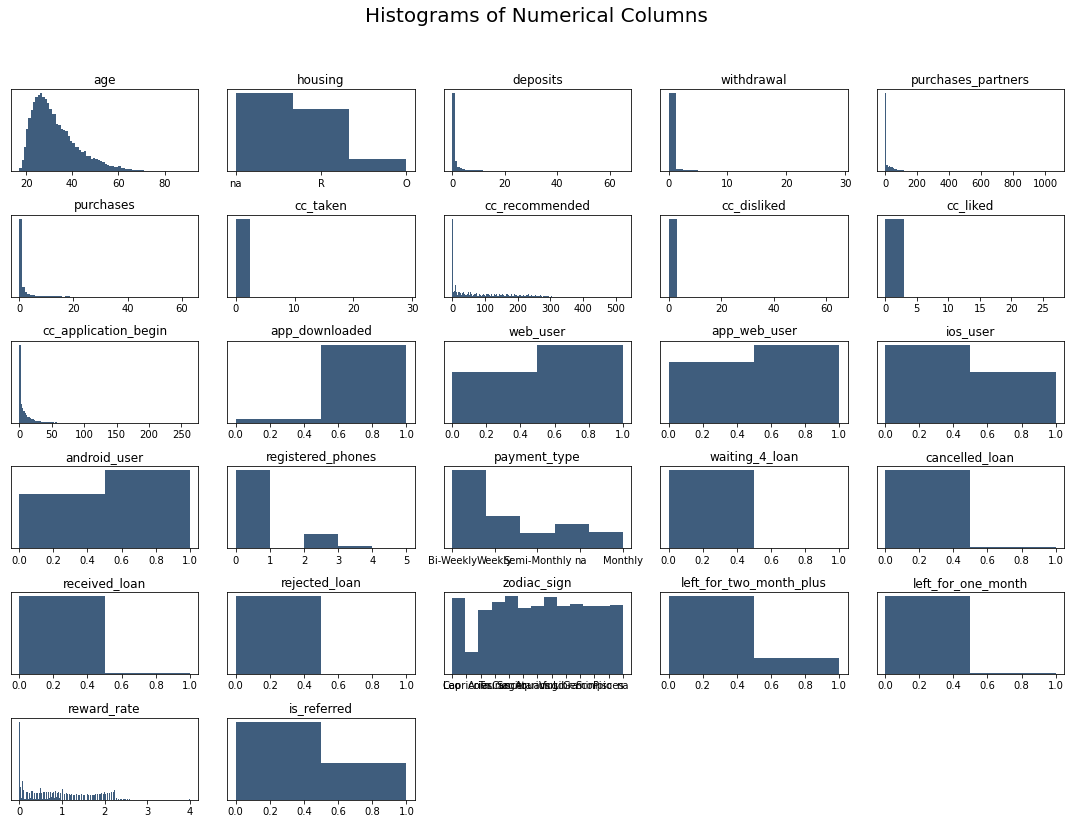

In [13]:
dataset2 = dataset.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Dos histogramas temos algumas observações, a variável age - temos que em média os mais jovens usando os serviços oferecidos.

Da variável housing temos que a maioridade são de não donos de imóvel.

Da variável withdrawal, podemos concluir pelo gráfico a que a maioria das pessoas não possuem depósitos.

Temos ainda algumas variáveis binárias, as quais devemos usar outro tipo de gráfico pra melhor entender a variável.

### Pie Plots
***

<ipython-input-14-3eb03d379883>:17: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values, labels = index, autopct='%1.1f%%')


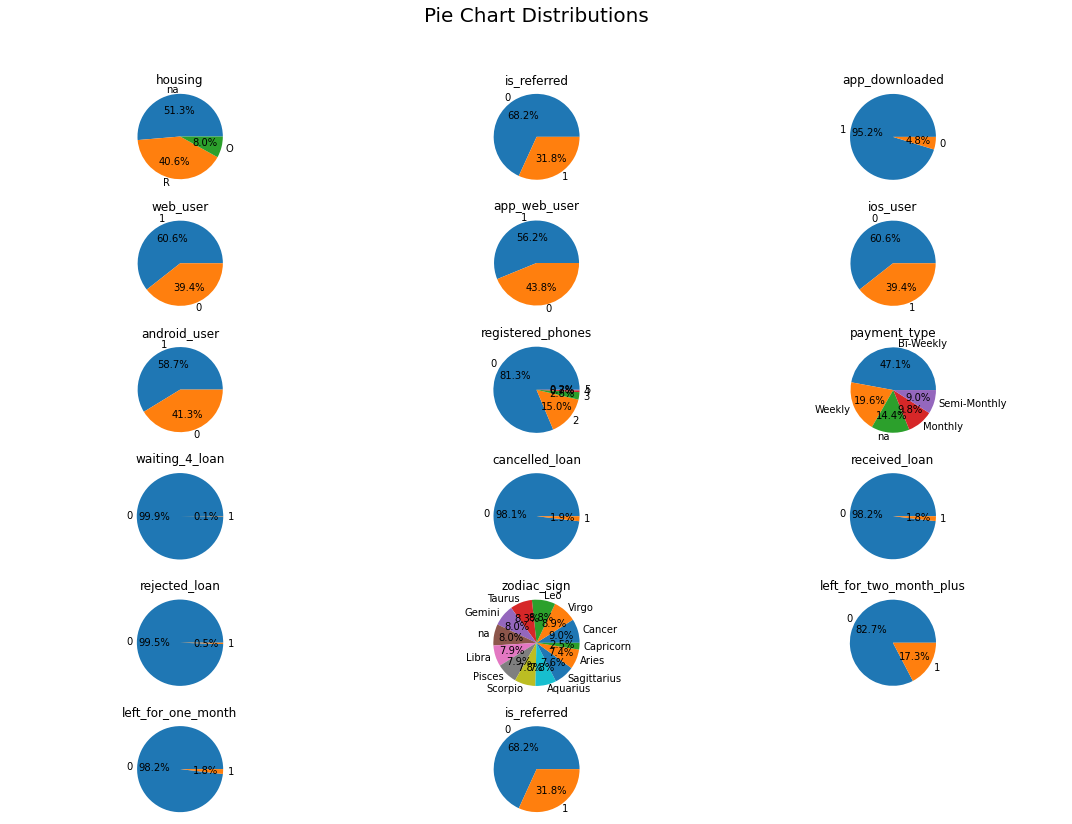

In [14]:
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


Checando a distribuição das variáveis com respeito a variável churn

In [16]:
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [17]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [18]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [19]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

Matrix de correlação

<AxesSubplot:title={'center':'Correlation with Response variable'}>

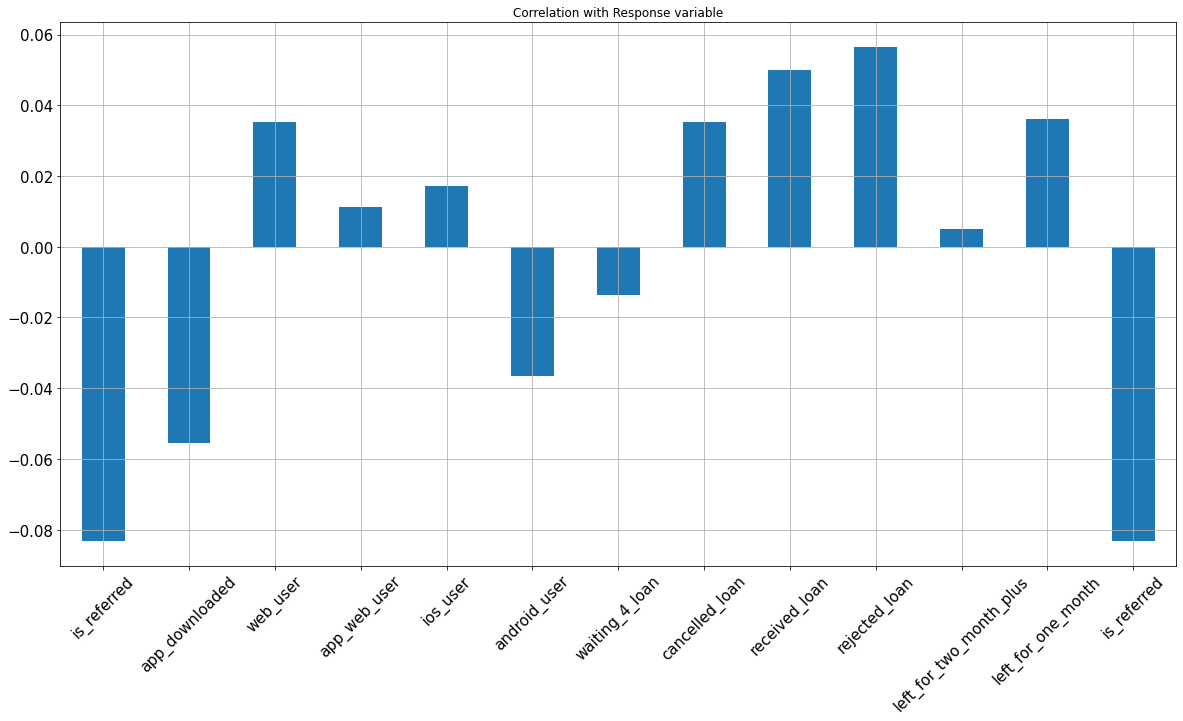

In [20]:
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

Do gráfico acima podemos ter uma ideia de que qto menos atividade o cliente tiver, mais propenso a ocorrer o churn. Aqui fica a dica para o time de estratégia de clientes, aumentando o engajamento do cliente através de mais serviços, ou serviços difernciados, mais facil será a retenção do cliente.

<AxesSubplot:>

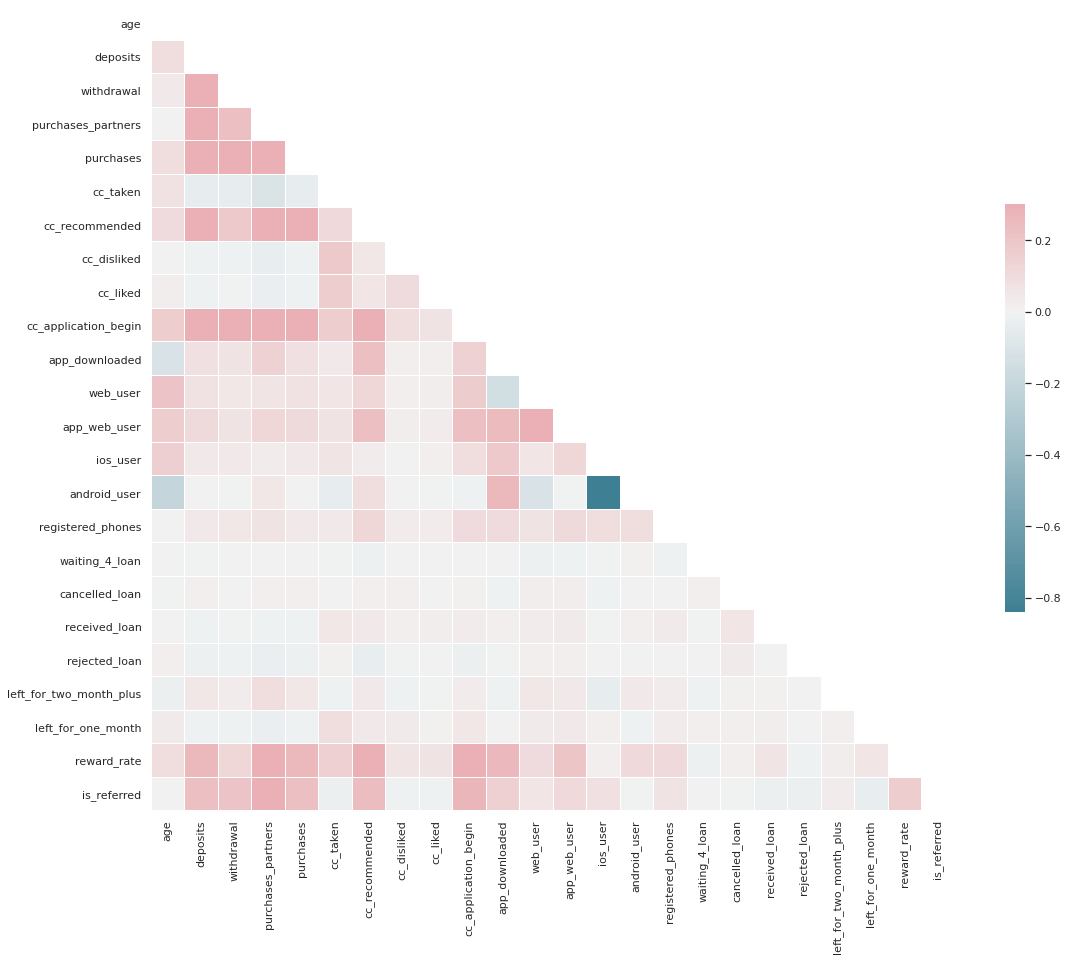

In [21]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Removendo variáveis correlacionadas

In [22]:
dataset = dataset.drop(columns = ['app_web_user'])

Embora haja algumas features correlacionadas, a relação entre elas não é colinear. 

Algumas features não se "ajudam", uma seleção de features deve remove-las. Embora não haja perigo de que elas influenciem o modelo a ponto de ocorrer um problema.

In [25]:
output_file ='new_churn_data.csv'
output_path = os.path.join(DATA, output_file)
dataset.to_csv(output_path,index = False)